In [1]:
import pandas as pd

In [3]:
signals = {}
signals['c0'] = 'Away from Home 6hr+ (SG)'
signals['c1'] = 'Away from Home 3-6hr+ (SG)'
signals['c2'] = 'Search Trends'
signals['c3'] = 'Doctor Visits'
signals['c4'] = 'Symptoms (FB)'
signals['c5'] = 'Symptoms in Community (FB)'
signals['c6'] = 'Combined'
signals['c7'] = 'COVID-19 Antigen Tests (Quidel)'
signals['c8'] = 'Hospital Admissions'
signals['c9'] = 'Cases'
signals['c10'] = 'Deaths'

In [4]:
import os

In [5]:
os.listdir()

['c8allStatesAllMAPData.csv',
 'c11allStatesAllMAPData.csv',
 'c7allStatesAllMAPData.csv',
 'c10allStatesAllMAPData.csv',
 'c2allStatesAllMAPData.csv',
 'c9allStatesAllMAPData.csv',
 'c5allStatesAllMAPData.csv',
 'c4allStatesAllMAPData.csv',
 'c1allStatesAllMAPData.csv',
 'c6allStatesAllMAPData.csv',
 'c3allStatesAllMAPData.csv']

In [6]:
fns = os.listdir()

In [17]:
dfs = []
for i in range(1,12):
    dfs.append(pd.read_csv('c'+str(i)+'allStatesAllMAPData.csv'))

In [18]:
for df in dfs:
    df['time_value'] = pd.to_datetime(df['time_value'])

In [27]:
for i,df in enumerate(dfs):
    df = df[['geo_value','time_value', 'value']]
    dfs[i] = df

In [51]:
dfs[10].head()

,geo_value,time_value,value
0,ak,2020-03-01,0.0
1,al,2020-03-01,0.0
2,ar,2020-03-01,0.0
3,az,2020-03-01,0.0
4,ca,2020-03-01,0.0


In [48]:
issue_df =  []
for df in dfs:
    issue_df.append(df[df['value']==0])

In [50]:
for df in issue_df:
    print(df['geo_value'].unique())

[]
[]
['ak' 'dc' 'ms' 'mt' 'wv' 'wy' 'nh' 'ok' 'sd' 'de' 'nd' 'nm' 'vt' 'ut'
 'me' 'id' 'ia' 'ne' 'ar' 'hi' 'ri' 'ks' 'or' 'co' 'in' 'tn' 'ct' 'mn'
 'nj' 'ky' 'la' 'md' 'al' 'nv' 'pa' 'va' 'ma' 'az' 'mo' 'sc' 'oh' 'wi'
 'il' 'wa' 'ny' 'mi']
['ak' 'dc' 'de' 'hi' 'id' 'me' 'mn' 'mt' 'nd' 'or' 'sd' 'vt' 'wv' 'wy'
 'nm' 'ri']
['pr' 'dc']
[]
[]
['mi' 'sd' 'wi' 'ia' 'vt' 'wv' 'nh' 'dc' 'de' 'id' 'ak' 'nm']
[]
['ak' 'al' 'ar' 'az' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id' 'in'
 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc' 'nd' 'ne'
 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'pa' 'pr' 'sc' 'sd' 'tn' 'tx' 'ut'
 'va' 'vt' 'wi' 'wv' 'wy']
['ak' 'al' 'ar' 'az' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'ia' 'id'
 'il' 'in' 'ks' 'ky' 'la' 'ma' 'md' 'me' 'mi' 'mn' 'mo' 'ms' 'mt' 'nc'
 'nd' 'ne' 'nh' 'nj' 'nm' 'nv' 'ny' 'oh' 'ok' 'or' 'pa' 'pr' 'ri' 'sc'
 'sd' 'tn' 'tx' 'ut' 'va' 'vt' 'wi' 'wv' 'wy']


In [28]:
import numpy as np
graph_df = np.empty(11, dtype=object)

In [29]:
rollingDays=7
for i, df in enumerate(dfs):
    graph_df[i] = pd.DataFrame()

    for region in df['geo_value'].unique():
        print(region)
        region_df = df.copy()[df['geo_value']==region]
        region_df.set_index('time_value', inplace=True)
        region_df.sort_index(inplace=True)
        region_df[f"{region}_val" + str(rollingDays)+"ma"] = region_df["value"].rolling(rollingDays).mean()

        if graph_df[i].empty:
            graph_df[i] = region_df[[f"{region}_val"+str(rollingDays) + "ma"]]  # note the double square brackets!
        else:
            graph_df[i] = graph_df[i].join(region_df[f"{region}_val"+ str(rollingDays) + "ma"])

ak
al
ar
as
az
ca
co
ct
dc
de
fl
ga
gu
hi
ia
id
il
in
ks
ky
la
ma
md
me
mi
mn
mo
mp
ms
mt
nc
nd
ne
nh
nj
nm
nv
ny
oh
ok
or
pa
pr
ri
sc
sd
tn
tx
ut
va
vi
vt
wa
wi
wv
wy
ak
al
ar
as
az
ca
co
ct
dc
de
fl
ga
gu
hi
ia
id
il
in
ks
ky
la
ma
md
me
mi
mn
mo
mp
ms
mt
nc
nd
ne
nh
nj
nm
nv
ny
oh
ok
or
pa
pr
ri
sc
sd
tn
tx
ut
va
vi
vt
wa
wi
wv
wy
ak
al
ar
az
ca
co
ct
dc
de
fl
ga
hi
ia
id
il
in
ks
ky
la
ma
md
me
mi
mn
mo
ms
mt
nc
nd
ne
nh
nj
nm
nv
ny
oh
ok
or
pa
ri
sc
sd
tn
tx
ut
va
vt
wa
wi
wv
wy
ak
al
ar
az
ca
co
ct
dc
de
fl
ga
hi
ia
id
il
in
ks
ky
la
ma
md
me
mi
mn
mo
ms
mt
nc
nd
ne
nh
nj
nm
nv
ny
oh
ok
or
pa
ri
sc
sd
tn
tx
ut
va
vt
wa
wi
wv
wy
pr
ak
al
ar
az
ca
co
ct
dc
de
fl
ga
hi
ia
id
il
in
ks
ky
la
ma
md
me
mi
mn
mo
ms
mt
nc
nd
ne
nh
nj
nm
nv
ny
oh
ok
or
pa
ri
sc
sd
tn
tx
ut
va
vt
wa
wi
wv
wy
pr
al
ar
az
ca
co
ct
de
fl
ga
hi
ia
id
il
in
ks
ky
la
ma
md
me
mi
mn
mo
ms
mt
nc
ne
nh
nj
nm
nv
ny
oh
ok
or
pa
ri
sc
sd
tn
tx
ut
va
wa
wi
wv
wy
ak
dc
nd
vt
pr
ak
al
ar
az
ca
co
ct
dc
de
fl
ga
hi
ia
id
i

In [12]:
try:
    os.mkdir('results/')
except:
    pass

In [52]:

for i, k in enumerate(list(signals.keys())):

    graph_df[i].to_csv('results/'+k+'_ '+ str(rollingDays) + 'D.csv')

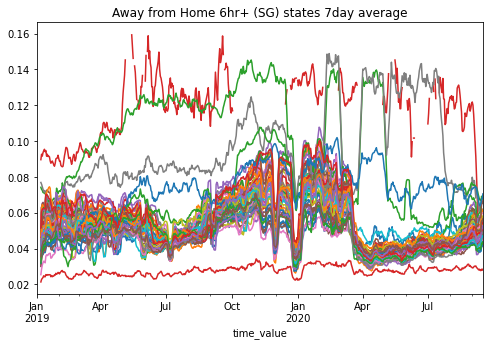

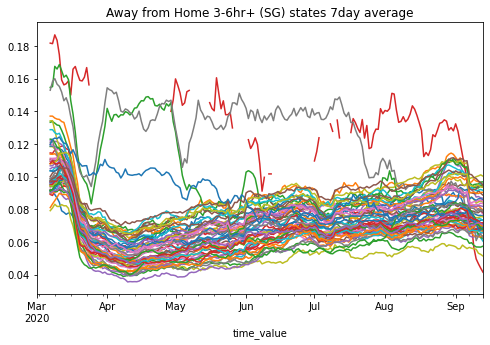

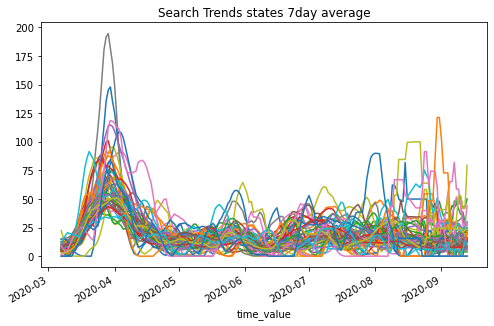

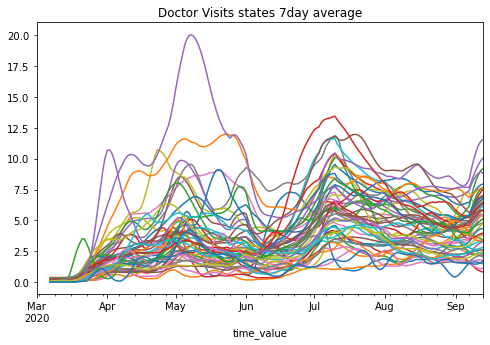

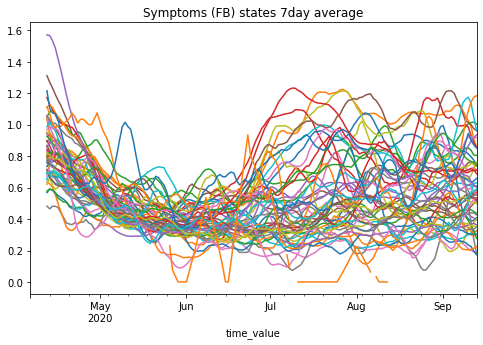

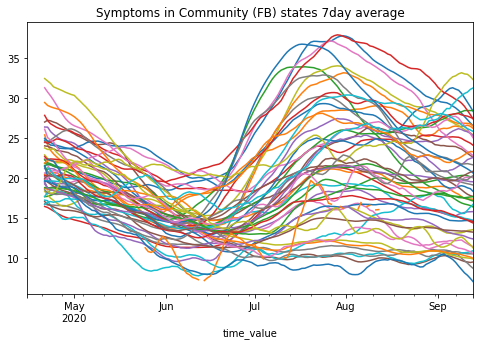

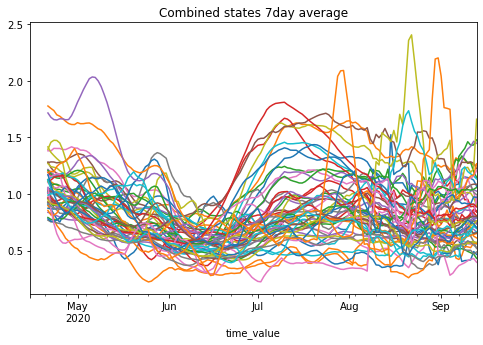

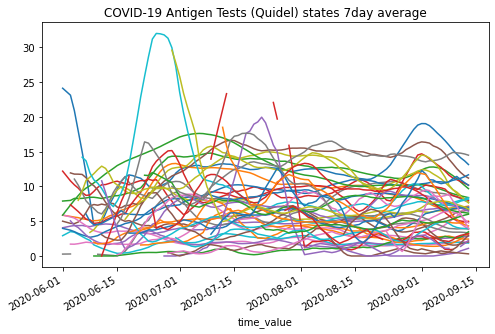

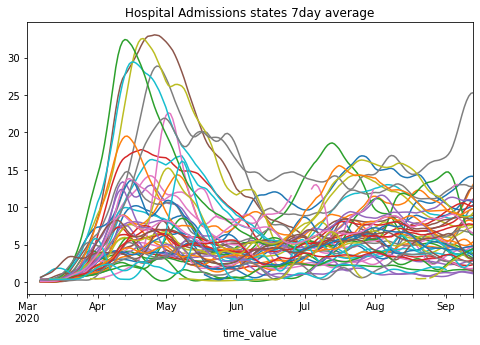

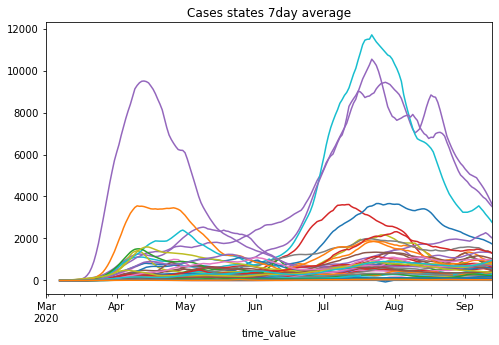

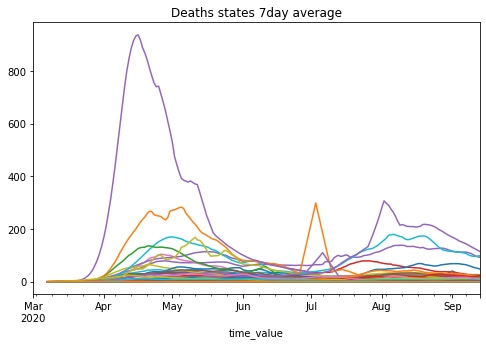

In [53]:
import matplotlib.pyplot as plt
for i, k in enumerate(list(signals.keys())):
    graph_df[i].plot(figsize=(8,5), legend=False, title=signals[k]+ ' states 7day average')
    plt.savefig('results/'+k+'7D.png')